In [79]:
import pandas as pd
import os
import json
import glob
import sqlite3

In [80]:
params

{'DATABASE': {'GAS_DB': 'gas_db.p'},
 'DIRECTORIES': {'DATA_DIR': '../../DATA', 'TMP_DIR': '../../tmp'},
 'FILES': {'PRICE_FILE': 'prices.p',
  'SERVICE_FILE': 'services.p',
  'STATION_FILE': 'stations.p'}}

In [81]:
with open('../parameters.json') as json_data:
    params = json.load(json_data)
    
    DATA_DIR = params['DIRECTORIES']['DATA_DIR']
    TMP_DIR = params['DIRECTORIES']['TMP_DIR']
    PRICE_FILE = params['FILES']['PRICE_FILE']
    STATION_FILE =params['FILES']['STATION_FILE']
    SERVICE_FILE =params['FILES']['SERVICE_FILE']
    GAS_DB = os.path.join(DATA_DIR, params['DATABASE']['GAS_DB'])

In [ ]:
#on va aller charger les données

In [ ]:
#c'est le repertoir ou je vais trouver mes data

In [82]:
DATA_DIR = '../../DATA'

In [83]:
TMP_DIR = '../../tmp'

In [84]:
gas_files = ['Prix2014.zip', 'Prix2015.zip', 'Prix2016.zip']
stations_file = 'stations2016.zip'
services_file = 'services2016.zip'

In [85]:
df2014 = pd.read_csv(DATA_DIR + '/' + gas_files[0])

In [86]:
df2014 = pd.read_csv(os.path.join(DATA_DIR,gas_files[0]),
                    sep=';', header=None, dtype = {1: str}
                    )
df2014.columns = ['id_station', 'code_postal', 'type_station', 'latitude',
                  'longitude', 'date_releve', 'type_carburant',
                  'libelle_carburant', 'prix']

In [87]:
df2014.columns

Index(['id_station', 'code_postal', 'type_station', 'latitude', 'longitude',
       'date_releve', 'type_carburant', 'libelle_carburant', 'prix'],
      dtype='object')

In [88]:
df2014.dtypes

id_station             int64
code_postal           object
type_station          object
latitude             float64
longitude            float64
date_releve           object
type_carburant       float64
libelle_carburant     object
prix                 float64
dtype: object

In [89]:
df2014.head()

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libelle_carburant,prix
0,1000001,01000,R,4620114.0,519791.0,2014-01-02 11:08:03,1.0,Gazole,1304.0
1,1000001,01000,R,4620114.0,519791.0,2014-01-04 09:54:03,1.0,Gazole,1304.0
2,1000001,01000,R,4620114.0,519791.0,2014-01-05 10:27:09,1.0,Gazole,1304.0
3,1000001,01000,R,4620114.0,519791.0,2014-01-06 09:07:51,1.0,Gazole,1304.0
4,1000001,01000,R,4620114.0,519791.0,2014-01-07 09:23:56,1.0,Gazole,1304.0


In [90]:
import glob

gas_files = glob.glob(os.path.join(DATA_DIR, "Prix*.zip")) # on met l'étoile pour éviter de tout écrire, il prend tout

In [91]:
dfall = pd.DataFrame()

for year in gas_files:
    df = pd.read_csv(year,
                    sep=';', header=None, dtype = {1: str}
                    )
    df.columns = ['id_station', 'code_postal', 'type_station',
                  'latitude','longitude', 'date_releve',
                  'type_carburant','libelle_carburant', 'prix']
                  
    dfall = pd.concat([dfall, df], axis=0)

assert dfall.shape[1] == 9, "Pas le bon nombre de colonnes"


In [92]:
gas_files

['../../DATA\\Prix2014.zip',
 '../../DATA\\Prix2015.zip',
 '../../DATA\\Prix2016.zip']

In [93]:
dfall.shape

(9401381, 9)

In [94]:
stations_files = glob.glob(os.path.join(DATA_DIR, "Stations*.zip"))

In [95]:
stations_files

['../../DATA\\Stations2016.zip']

In [96]:
dfstations = pd.read_csv(stations_files[0],
                         sep='|',
                         dtype={1: str},
                         encoding='utf-8')
dfstations.columns = ['id_station', 'code_postal', 'type_station',
                     'latitude', 'longitude', 'adresse', 'ville']

In [97]:
dfstations.head()

,id_station,code_postal,type_station,latitude,longitude,adresse,ville
0,1000002,01000,R,4.621842e+06,522767.000000,16 Avenue de Marboz,BOURG-EN-BRESSE
1,1000004,01000,R,4.618836e+06,524447.000000,20 Avenue du Maréchal Juin,Bourg-en-Bresse
2,1000005,01000,R,4.620094e+06,519942.024022,642 Avenue de Trévoux,SAINT-DENIS-LèS-BOURG
3,1000006,01000,R,4.620754e+06,523758.000000,1 Boulevard John Kennedy,BOURG-EN-BRESSE
4,1000007,01000,R,4.620105e+06,524891.000000,360 AVENUE DU CAPITAINE DHONNE,Bourg-en-Bresse


In [98]:
dfservices = pd.read_csv(os.path.join(DATA_DIR, services_file),
                         sep='|',
                         header=None,
                         dtype={1: str},
                         encoding='utf-8')
dfservices.columns = ['id_station', 'code_postal', 'type_station',
                     'latitude', 'longitude','services']

In [99]:
dfall.to_pickle(os.path.join(DATA_DIR, PRICE_FILE)) # format de serialisation, data frame et l'enregister sur disque
dfstations.to_pickle(os.path.join(DATA_DIR, STATION_FILE))
dfservices.to_pickle(os.path.join(DATA_DIR, SERVICE_FILE))

In [100]:
testdf = pd.read_pickle(os.path.join(DATA_DIR, PRICE_FILE))

In [101]:
cnx = sqlite3.connect(GAS_DB)

In [102]:
dfall.to_sql('prices', cnx, index=False, if_exists='replace')

In [103]:
dfservices.to_sql('services', cnx, index=False, if_exists='replace')

In [104]:
dfstations.to_sql('stations', cnx, index=False, if_exists='replace')

In [105]:
pd.read_sql_query('select * from prices where code_postal="13001"',
                 cnx)

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libelle_carburant,prix
0,13001001,13001,R,4330446.0,538957.0,2014-01-01 06:00:00,1.0,Gazole,1399.0
1,13001001,13001,R,4330446.0,538957.0,2014-01-07 06:00:00,1.0,Gazole,1389.0
2,13001001,13001,R,4330446.0,538957.0,2014-01-24 06:00:00,1.0,Gazole,1389.0
3,13001001,13001,R,4330446.0,538957.0,2014-01-25 06:00:00,1.0,Gazole,1384.0
4,13001001,13001,R,4330446.0,538957.0,2014-01-28 06:00:00,1.0,Gazole,1389.0
5,13001001,13001,R,4330446.0,538957.0,2014-01-29 06:00:00,1.0,Gazole,1389.0
6,13001001,13001,R,4330446.0,538957.0,2014-01-30 06:00:00,1.0,Gazole,1389.0
7,13001001,13001,R,4330446.0,538957.0,2014-02-14 06:00:00,1.0,Gazole,1394.0
8,13001001,13001,R,4330446.0,538957.0,2014-02-18 06:00:00,1.0,Gazole,1399.0
9,13001001,13001,R,4330446.0,538957.0,2014-02-26 06:00:00,1.0,Gazole,1394.0


In [106]:
cur = cnx.cursor()

In [107]:
cur.execute('select * from prices where prix > 1400')

In [108]:
res = cur.fetchall()

In [109]:
res[:2]

[(1000001,
  '01000',
  'R',
  4620114.0,
  519791.0,
  '2014-02-28 10:28:03',
  1.0,
  'Gazole',
  1535.0),
 (1000001,
  '01000',
  'R',
  4620114.0,
  519791.0,
  '2014-03-22 08:55:00',
  1.0,
  'Gazole',
  1529.0)]

In [110]:
res_df = pd.read_sql_query("SELECT * FROM prices WHERE prix >1400", cnx)

In [111]:
res_df.head()

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libelle_carburant,prix
0,1000001,01000,R,4620114.0,519791.0,2014-02-28 10:28:03,1.0,Gazole,1535.0
1,1000001,01000,R,4620114.0,519791.0,2014-03-22 08:55:00,1.0,Gazole,1529.0
2,1000001,01000,R,4620114.0,519791.0,2014-01-02 11:08:03,2.0,SP95,1499.0
3,1000001,01000,R,4620114.0,519791.0,2014-01-04 09:54:03,2.0,SP95,1499.0
4,1000001,01000,R,4620114.0,519791.0,2014-01-05 10:27:09,2.0,SP95,1499.0


In [112]:
import numpy as np

In [113]:
dfall['date_releve'] = pd.to_datetime(dfall.date_releve) #pour passer à datetime

In [114]:
dfall.dtypes

id_station                    int64
code_postal                  object
type_station                 object
latitude                    float64
longitude                   float64
date_releve          datetime64[ns]
type_carburant              float64
libelle_carburant            object
prix                        float64
dtype: object

In [115]:
dfall.date_releve.dt.week.head() # on prend la colonne date_releve

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: date_releve, dtype: float64

In [117]:
dfall['semaine'] = dfall.date_releve.dt.week + 52 * (dfall.date_releve.dt.year - 2014)

In [118]:
dfall.semaine.min()

1.0

In [119]:
dfall[dfall.date_releve.dt.year == 2016].date_releve.dt.week.max() # on 53 semaine en 2016, la formule ne marche plus avec 2017 car 52

53

In [120]:
dfall.semaine.max()

157.0

In [121]:
dfall.groupby(['libelle_carburant', 'semaine']).agg({'prix': np.mean}).head() # on groupe par le lib et semaine, on a la moyenne du prix

prix
libelle_carburant semaine             
E10               1.0      1380.460069
                  2.0      1487.090961
                  3.0      1478.254481
                  4.0      1476.861855
                  5.0      1478.376765

In [122]:
dfall.groupby(['libelle_carburant', 'semaine']).agg({'prix': [np.mean, min, max]}).head()

prix                
                                  mean     min     max
libelle_carburant semaine                             
E10               1.0      1380.460069  1129.0  1689.0
                  2.0      1487.090961  1249.0  1720.0
                  3.0      1478.254481  1247.0  1650.0
                  4.0      1476.861855  1350.0  1720.0
                  5.0      1478.376765  1308.0  1670.0

In [141]:
moyenne_hebdo_df = dfall.groupby(['libelle_carburant', 'semaine']).agg({'prix': np.mean}).reset_index()

In [124]:
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

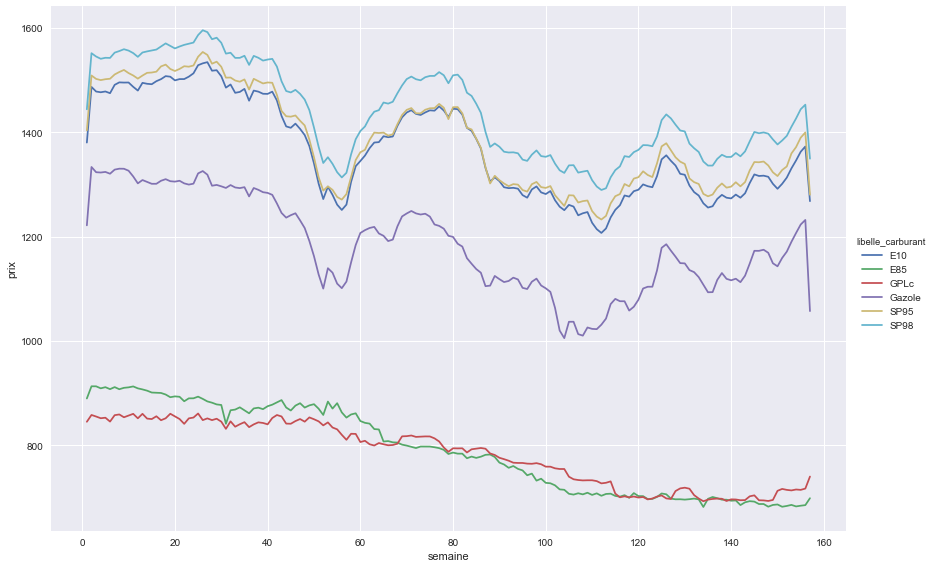

In [135]:
graph = sns.FacetGrid(moyenne_hebdo_df, hue='libelle_carburant', size=8, aspect=1.5)
graph.map(plt.plot, "semaine", "prix")
graph.add_legend()

In [143]:
moyenne_hebdo_df = (dfall
                    .dropna(subset=['date_releve'])
                    .groupby(['libelle_carburant', pd.Grouper(key='date_releve', freq="1w")])
                    .agg({'prix': np.mean})
                   ).head()

In [137]:
moyenne_hebdo_df.head() #on les début de semaines, il prend le premier jour de la semaine à chaque fois

prix
libelle_carburant date_releve             
E10               2014-01-05   1490.439833
                  2014-01-12   1487.090961
                  2014-01-19   1478.254481
                  2014-01-26   1476.861855
                  2014-02-02   1478.376765

In [144]:
moyenne_hebdo_df = (dfall
                    .dropna(subset=['date_releve'])
                    .groupby(['libelle_carburant', pd.Grouper(key='date_releve', freq="2w-MON")])
                    .agg({'prix': np.mean})
                   ).reset_index()

In [145]:
moyenne_hebdo_df.head() #le premier jour de la semaine est lundi

,libelle_carburant,date_releve,prix
0,E10,2014-01-06,1490.073267
1,E10,2014-01-20,1481.514076
2,E10,2014-02-03,1478.358741
3,E10,2014-02-17,1484.497754
4,E10,2014-03-03,1495.865215


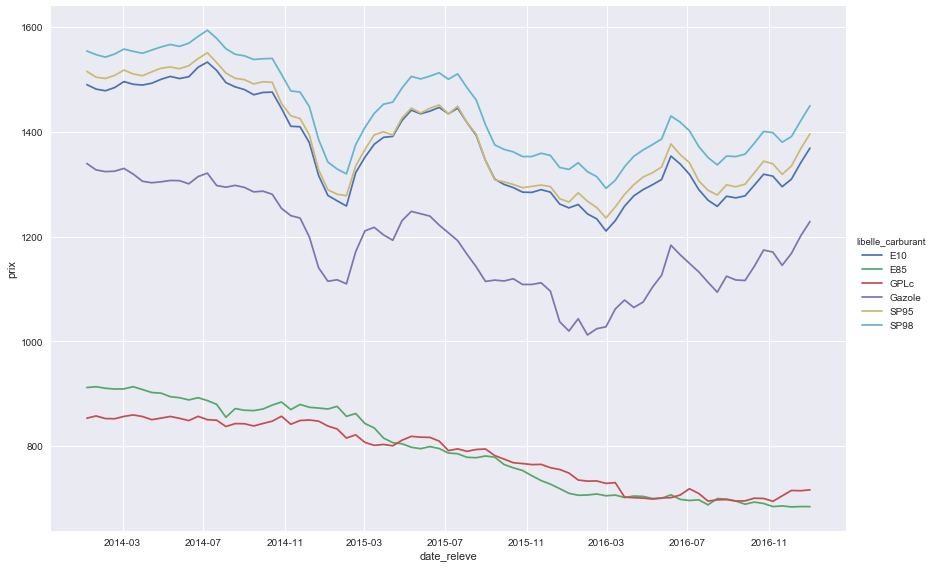

In [146]:
graph = sns.FacetGrid(moyenne_hebdo_df, hue='libelle_carburant', size=8, aspect=1.5)
graph.map(plt.plot, "date_releve", "prix")
graph.add_legend()

In [ ]:
#Modelisation

In [148]:
dfservices.nunique()

id_station      12391
code_postal      4297
type_station        3
latitude        11115
longitude       11128
services         4780
dtype: int64

In [ ]:
pd.get_dummies

In [151]:
dfservices.services.str.split(',').head()

0        [Station de gonflage, Vente de gaz domestique,...
1                   [Vente de gaz domestique, Automate CB]
2        [Carburant qualité supérieure, GPL, Toilettes ...
3        [Carburant qualité supérieure, Station de lava...
4                                [Vente de gaz domestique]
5        [Station de lavage, Vente de gaz domestique, A...
6        [Toilettes publiques, Vente de gaz domestique,...
7        [Station de lavage, Vente de gaz domestique, A...
8                                            [Automate CB]
9                                                      NaN
10             [Carburant qualité supérieure, Automate CB]
11                                           [Automate CB]
12       [Carburant qualité supérieure, GPL, Vente de g...
13                  [Vente de gaz domestique, Automate CB]
14       [Carburant qualité supérieure, GPL, Boutique a...
15       [Restauration à emporter, Carburant qualité su...
16       [Restauration sur place, Toilettes publiques, .

In [149]:
dfservices.shape

(12391, 6)

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

In [153]:
_tokenize = lambda x: x.split(',')

In [155]:
vectorize = CountVectorizer(tokenizer=_tokenize, lowercase=False)

In [156]:
vectorize = CountVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)

In [157]:
vectorize.fit_transform(dfservices.fillna('Rien'))

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [158]:
vectorize.vocabulary_

{'code_postal': 0,
 'id_station': 1,
 'latitude': 2,
 'longitude': 3,
 'services': 4,
 'type_station': 5}